# Regressão 01 - tarefa 03 - transformações em X e Y

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [29]:
tips = sns.load_dataset('tips')

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [36]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)

In [38]:
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [40]:
reg = smf.ols('tip ~ sex + smoker + time + net_bill', data = tips).fit()

In [42]:
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           2.64e-20
Time:                        17:01:53   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()

In [46]:
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           5.02e-23
Time:                        17:01:54   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

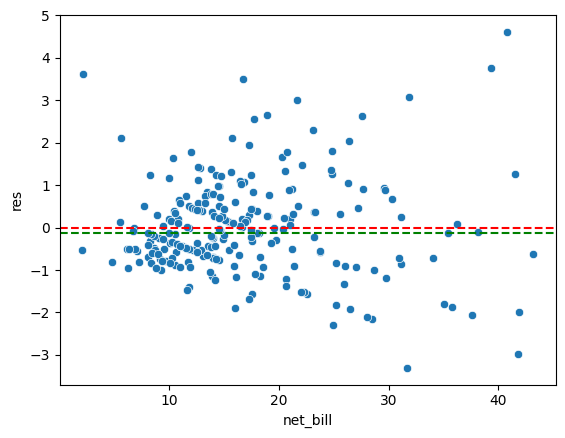

In [48]:
sns.scatterplot(x='net_bill', y='res', data = tips)
plt.axhline(y=tips['res'].values.mean(), color='r', linestyle='--')
plt.axhline(y=tips['res'].median(), color='g', linestyle='--')

O gráfico de resíduo apresenta uma tendência abertura para valores maiores de net_bill

In [51]:
reg= smf.ols('tip ~ np.log(net_bill+0.001)', data = tips).fit()
tips['res_log'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           4.39e-20
Time:                        17:01:57   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.2581      0.430     -2.925      0.004      -2.105      -0.411
np.log(net_bill + 0.001)     1.5697      0.156     10.050      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.938   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.112
Skew:                           1.303   Prob(JB):                     9.69e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

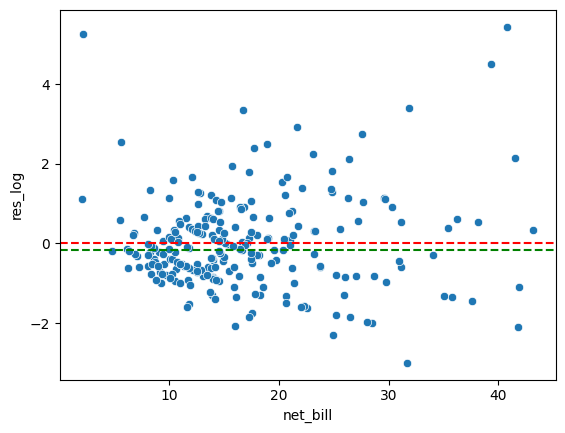

In [53]:
sns.scatterplot(x='net_bill', y='res_log', data = tips)
plt.axhline(y=tips['res_log'].values.mean(), color='r', linestyle='--')
plt.axhline(y=tips['res_log'].median(), color='g', linestyle='--')

In [55]:
O gráfico do resíduo melhorou um pouco, mas ainda não é o ideal. Além disso, o R² diminuiu.

SyntaxError: invalid character '²' (U+00B2) (1420439753.py, line 1)

In [57]:
reg= smf.ols('tip ~ np.power(net_bill,2)', data = tips).fit()
tips['res_exp'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.47e-20
Time:                        17:02:00   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

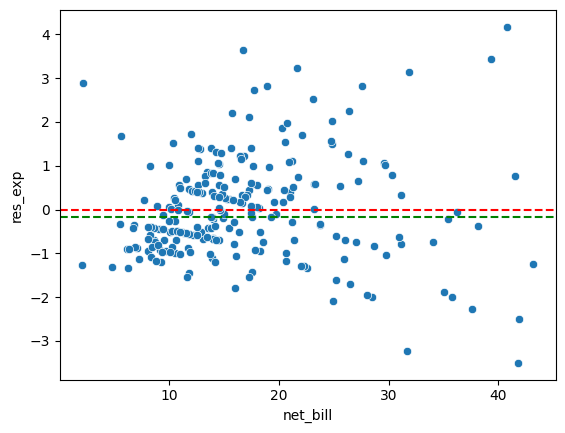

In [59]:
sns.scatterplot(x='net_bill', y='res_exp', data = tips)
plt.axhline(y=tips['res_exp'].values.mean(), color='r', linestyle='--')
plt.axhline(y=tips['res_exp'].median(), color='g', linestyle='--')

O modelo usando log apresentou uma melhor distribuição dos resíduos, apesar de apresentar uma pequena redução no valor de R²

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [63]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)

In [65]:
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [67]:
reg = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill', data = tips).fit()

In [69]:
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.21e-18
Time:                        17:02:07   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
reg = smf.ols('np.log(tip) ~ net_bill', data = tips).fit()

In [73]:
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           2.60e-21
Time:                        17:02:21   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

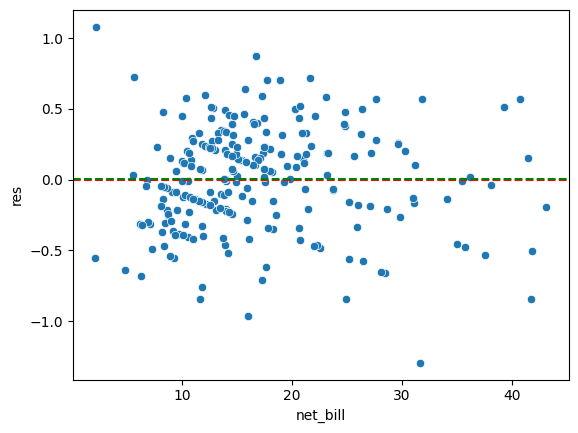

In [75]:
sns.scatterplot(x='net_bill', y='res', data = tips)
plt.axhline(y=tips['res'].values.mean(), color='r', linestyle='--')
plt.axhline(y=tips['res'].median(), color='g', linestyle='--')

In [77]:
tips['pred_y'] = np.exp(reg.fittedvalues)
tips[['pred_y','net_bill']].corr().iloc[0,1]**2

0.9725477490263615

In [79]:
reg = smf.ols('np.log(tip) ~ np.log(net_bill)', data = tips).fit()

In [81]:
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           5.62e-22
Time:                        17:02:26   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

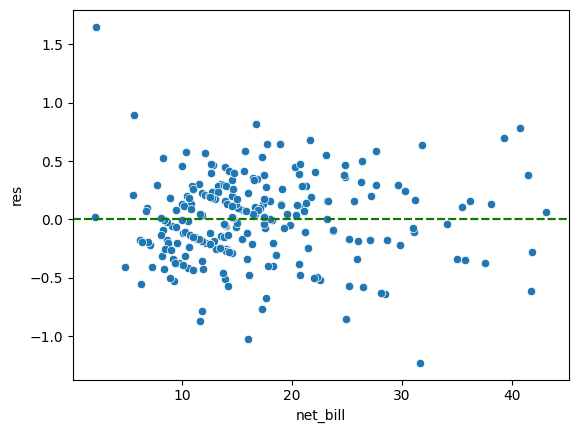

In [83]:
sns.scatterplot(x='net_bill', y='res', data = tips)
plt.axhline(y=tips['res'].values.mean(), color='r', linestyle='--')
plt.axhline(y=tips['res'].median(), color='g', linestyle='--')

In [85]:
tips['pred_y'] = np.exp(reg.fittedvalues)
tips[['pred_y','net_bill']].corr().iloc[0,1]**2

0.9778476588093389

In [87]:
reg = smf.ols('np.log(tip) ~ np.power(net_bill,2)', data = tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           7.70e-17
Time:                        17:02:31   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7894      0.034     23.273      0.000       0.723       0.856
np.power(net_bill, 2)     0.0006   6.86e-05      8.982      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.469   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.507
Skew:                          -0.240   Prob(JB):                        0.285
Kurtosis:                       2.874   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

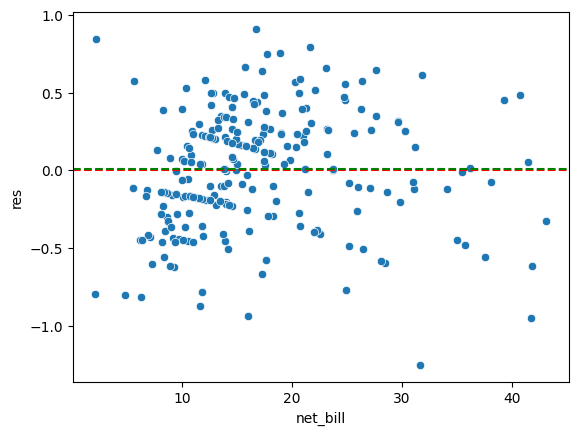

In [89]:
sns.scatterplot(x='net_bill', y='res', data = tips)
plt.axhline(y=tips['res'].values.mean(), color='r', linestyle='--')
plt.axhline(y=tips['res'].median(), color='g', linestyle='--')

In [91]:
tips['pred_y'] = np.exp(reg.fittedvalues)
tips[['pred_y','net_bill']].corr().iloc[0,1]**2

0.8486658769820419

O melhor modelo é o 1, pois apresentou um R² de 0.977 e um gráfico de resíduos sem tendência.

In [94]:
O modelo escolhido no exercício 2 apresentou um R² de 0.977, enquanto o modelo escolhido do exercício 1 apresentou um R² de 0.294

SyntaxError: invalid character '²' (U+00B2) (3408955474.py, line 1)

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [97]:
arquivo = pd.read_csv('previsao_de_renda.csv')
df = pd.DataFrame(arquivo)

In [99]:
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:02:44   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observando a tabela acima o R² não foi bom.

In [102]:
df['res'] = reg.resid

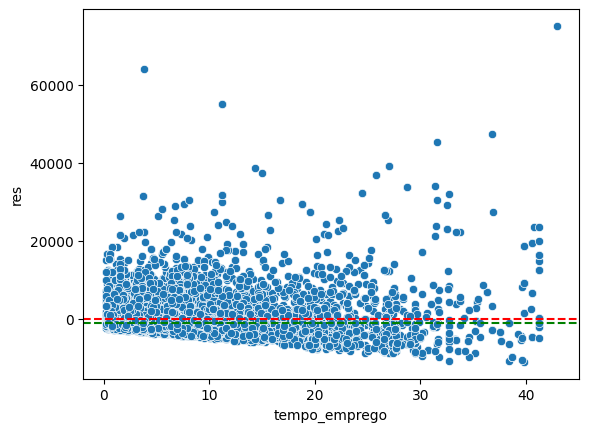

In [104]:
sns.scatterplot(x='tempo_emprego', y='res', data = df)
plt.axhline(y=df['res'].mean(), color='r', linestyle='--')
plt.axhline(y=df['res'].median(), color='g', linestyle='--')

Poderia melhorar a regressão aplicando log ou um polinômio na variável explicativa.

In [107]:
reg = smf.ols('renda ~ tempo_emprego + sexo + idade + posse_de_veiculo+posse_de_imovel+ qtd_filhos+tipo_renda+educacao+estado_civil+tipo_residencia+qt_pessoas_residencia', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:02:53   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -271.2003   1674.811     -0.162      0.871   -3554.089    3011.688
sexo[T.M]                         2366.1922     88.099     26.858      0.000    2193.505    2538.879
posse_de_veiculo[T.True]           -79.1270     84.709     -0.934      0.350    -245.169      86.915
posse_de_imovel[T.True]            349.0015     83.426      4.183      0.000     185.473     512.530
tipo_renda[T.Bolsista]            -817.4651   2155.323     -0.379      0.704   -5042.231    3407.301
tipo_renda[T.Empresário]          1021.9116     90.142     11.337      0.000     845.219    1198.605
tipo_renda[T.Pensionista]         1725.6132   1437.300      1.201      0.230   -1091.716    4542.943
tipo_renda[T.Servidor público]     436.9668    130.511      3.348      0.001     181.145     692.788
educacao[T.Pós graduação]         2207.5583   1081.061      2.042      0.041      88.511    4326.606
educacao[T.Secundário]            -241.1964    437.786     -0.551      0.582   -1099.324     616.931
educacao[T.Superior completo]      338.2616    439.622      0.769      0.442    -523.465    1199.988
educacao[T.Superior incompleto]   -296.2056    470.976     -0.629      0.529   -1219.392     626.981
estado_civil[T.Separado]           141.9156    806.277      0.176      0.860   -1438.512    1722.343
estado_civil[T.Solteiro]           376.1573    791.461      0.475      0.635   -1175.228    1927.542
estado_civil[T.União]              -41.0497    143.754     -0.286      0.775    -322.829     240.730
estado_civil[T.Viúvo]              -41.1125    827.976     -0.050      0.960   -1664.073    1581.848
tipo_residencia[T.Casa]           -356.2809    328.620     -1.084      0.278   -1000.428     287.866
tipo_residencia[T.Com os pais]    -640.8115    368.489     -1.739      0.082   -1363.106      81.483
tipo_residencia[T.Comunitário]    -577.7117    634.059     -0.911      0.362   -1820.565     665.142
tipo_residencia[T.Estúdio]        -976.1765    547.353     -1.783      0.075   -2049.073      96.720
tipo_residencia[T.Governamental]  -883.1863    397.273     -2.223      0.026   -1661.903    -104.470
tempo_emprego                      299.3338      6.140     48.750      0.000     287.298     311.369
idade                               29.8746      4.808      6.213      0.000      20.450      39.299
qtd_filhos                        -240.3254    789.406     -0.304      0.761   -1787.683    1307.032
qt_pessoas_residencia              306.2508    787.902      0.389      0.698   -1238.159    1850.661
==============================================================================
Omnibus:                    10075.335   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432391.441
Skew:             

In [109]:
reg = smf.ols('renda ~ tempo_emprego + idade  + posse_de_imovel  ', data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     776.5
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:02:55   Log-Likelihood:            -1.2247e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12462   BIC:                         2.450e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1954.4110    183.601     10.645      0.000    1594.524    2314.298
posse_de_imovel[T.True]   390.9804     84.427      4.631      0.000     225.491     556.469
tempo_emprego             278.0060      6.249     44.489      0.000     265.757     290.255
idade                      11.9421      4.541      2.630      0.009       3.042      20.842
==============================================================================
Omnibus:                     9986.484   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389946.526
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      29.455   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
As variáveis escolhidas são significativas, apresentando p-value igual a zero. Entretanto o valor de R² diminuiu.

SyntaxError: invalid character '²' (U+00B2) (2883093406.py, line 1)

In [113]:
df['res'] = reg.resid

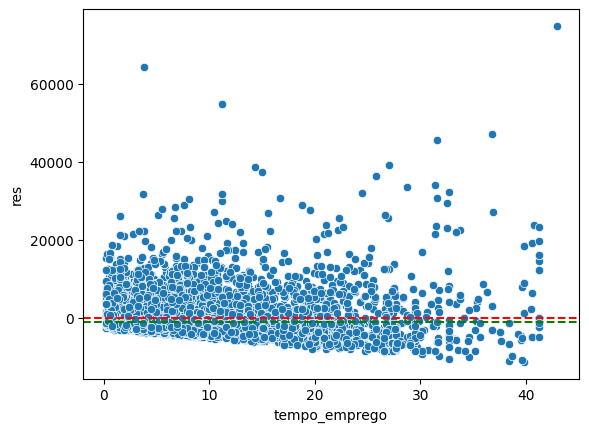

In [115]:
sns.scatterplot(x='tempo_emprego', y='res', data = df)
plt.axhline(y=df['res'].mean(), color='r', linestyle='--')
plt.axhline(y=df['res'].median(), color='g', linestyle='--')

<Axes: xlabel='posse_de_imovel', ylabel='res'>

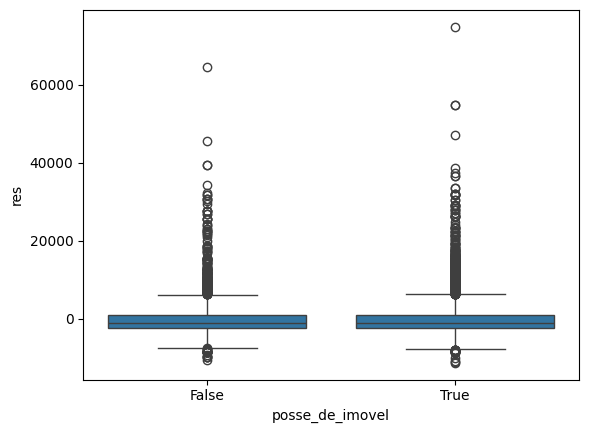

In [117]:
sns.boxplot(x = 'posse_de_imovel', y='res', data = df)

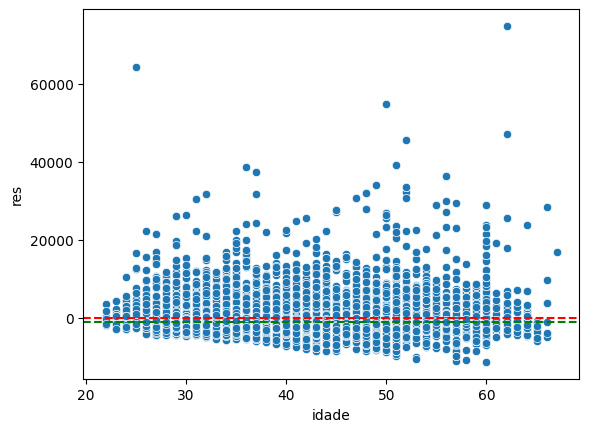

In [119]:
sns.scatterplot(x='idade', y='res', data = df)
plt.axhline(y=df['res'].mean(), color='r', linestyle='--')
plt.axhline(y=df['res'].median(), color='g', linestyle='--')

In [ ]:
Os gráficos de resíduos estão bons, mas aconteceu pouca diferença para o gráfico de tempo_emprego. Vale ressaltar que também aconteceu pouca 
variação do valor de R²entre os dois modelos